In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import cufflinks as cf
%matplotlib inline
%matplotlib notebook

In [135]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [136]:
import plotly.express as px

In [137]:
delivers = pd.read_csv('D:\datasets\deliveries.csv')

In [138]:
delivers.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [139]:
delivers.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [140]:
matches = pd.read_csv('D:\datasets\matches.csv')

In [141]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [142]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [143]:
matches["result"].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [144]:
no_result =matches[matches['result'] == 'no result']


In [145]:
matches_result = matches[['team1','team2','winner']]
matches_result.head()

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [146]:
matches_result['lost'] = matches_result.apply(lambda x:   (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 1)

In [147]:
matches_result.head(10)

,team1,team2,winner,lost
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,Gujarat Lions
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore
8,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,Rising Pune Supergiant
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,Sunrisers Hyderabad


In [148]:
wins = matches_result['winner'].value_counts()
wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [149]:
lost = matches_result['lost'].value_counts()
lost

Royal Challengers Bangalore    95
Kings XI Punjab                94
Delhi Daredevils               94
Kolkata Knight Riders          86
Mumbai Indians                 78
Rajasthan Royals               70
Chennai Super Kings            64
Sunrisers Hyderabad            50
Deccan Chargers                46
Pune Warriors                  33
Gujarat Lions                  17
Rising Pune Supergiants         9
Kochi Tuskers Kerala            8
Rising Pune Supergiant          6
Delhi Capitals                  6
Name: lost, dtype: int64

In [150]:
tie = matches[matches['result'] == 'tie']
tie

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [151]:
wins.iplot(kind ='bar',xTitle ='Team',yTitle='Count',title='Winning Count')

In [19]:
lost.iplot(kind = 'bar',xTitle = 'Team',yTitle = 'Count',title = 'Losing count')

# MI VS DC

In [20]:
def get_midc(team1,team2):
    teams =['Delhi Daredevils','Mumbai Indians']
    
    if team1 in teams and team2 in teams:
        return True
    else:
        return False


In [21]:
index = [ ]

for row in matches.iterrows():
    flag = get_midc(row[1]['team1'],row[1]['team2'])
    index.append(flag)
    
sum(index)

22

In [22]:
midd = matches[index]

In [23]:
midd.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [24]:
def get_midc(team1,team2):
    teams =['Delhi Capitals','Mumbai Indians']
    
    if team1 in teams and team2 in teams:
        return True
    else:
        return False


In [25]:
index = [ ]

for row in matches.iterrows():
    flag = get_midc(row[1]['team1'],row[1]['team2'])
    index.append(flag)
    
sum(index)

2

In [26]:
mi_dc = matches[index]

In [27]:
mi_dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
698,11139,2019,Mumbai,24/03/19,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
729,11325,2019,Delhi,18/04/19,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford,Anil Chaudhary


In [28]:
mi_dd = pd.concat([midd,mi_dc])

In [29]:
mi_dd

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN
169,170,2009,Centurion,2009-05-21,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,4,V Sehwag,SuperSport Park,IL Howell,S Ravi,NaN
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
220,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
237,238,2011,Delhi,2011-04-10,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
281,282,2011,Mumbai,2011-05-07,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,32,0,AT Rayudu,Wankhede Stadium,K Hariharan,SJA Taufel,NaN


In [30]:
mi_dd['team1'].unique()

array(['Mumbai Indians', 'Delhi Daredevils', 'Delhi Capitals'],
      dtype=object)

In [31]:
oldname = ['Mumbai Indians', 'Delhi Daredevils','Delhi Capitals']
newname = ['MI','DC','DC']
mi_dd = mi_dd.replace(oldname,newname)

In [32]:
mi_dd.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,MI,DC,DC,field,normal,0,MI,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,MI,DC,DC,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,MI,DC,DC,field,normal,0,MI,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,MI,DC,DC,field,normal,0,DC,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,MI,DC,MI,bat,normal,0,DC,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN


In [33]:
mi_dd =mi_dd.drop('dl_applied',axis = 1)

# Team Head to Head win

In [34]:
mi_dd['winner'].value_counts().iplot(kind='bar')

In [35]:
Winner =mi_dd['winner'].value_counts()

In [36]:
fig = px.pie(values=Winner,names = ['Mumbai Indians',"Delhi Capitals"])
fig.show()

# Toss Decision

In [37]:
mi_dd['toss_decision'].value_counts().iplot(kind ='bar')

In [38]:
Decision =mi_dd['toss_decision'].value_counts()

In [39]:
fig = px.pie(values=Decision,names = ['Field',"Bat"])
fig.show()

In [40]:
mi_dd['toss_decision'].value_counts().iplot(kind ='bar')

In [41]:
corr =mi_dd.corr()

<IPython.core.display.Javascript object>


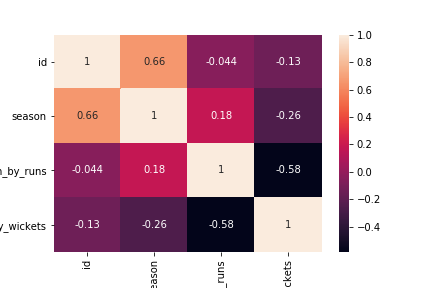

In [42]:
sns.heatmap(corr,annot = True)

In [43]:
mi_dd.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,MI,DC,DC,field,normal,MI,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [44]:
team_win= mi_dd[['team1','team2','toss_winner','toss_decision','winner']]
team_win.head()

,team1,team2,toss_winner,toss_decision,winner
23,MI,DC,DC,field,MI
43,MI,DC,DC,field,MI
81,MI,DC,DC,field,MI
108,MI,DC,DC,field,DC
149,MI,DC,MI,bat,DC


In [45]:
team_decision= mi_dd[['toss_winner','toss_decision','winner']]
team_decision.head()

,toss_winner,toss_decision,winner
23,DC,field,MI
43,DC,field,MI
81,DC,field,MI
108,DC,field,DC
149,MI,bat,DC


In [46]:
venue= mi_dd[['toss_winner','toss_decision','venue','winner']]
venue.head(18)

,toss_winner,toss_decision,venue,winner
23,DC,field,Wankhede Stadium,MI
43,DC,field,Feroz Shah Kotla,MI
81,DC,field,Dr DY Patil Sports Academy,MI
108,DC,field,Feroz Shah Kotla,DC
149,MI,bat,Buffalo Park,DC
169,DC,field,SuperSport Park,DC
182,DC,field,Feroz Shah Kotla,MI
220,MI,bat,Brabourne Stadium,MI
237,DC,bat,Feroz Shah Kotla,MI
281,DC,field,Wankhede Stadium,MI


# Team Toss Decision and Winner result

In [47]:
team_decision.groupby(['toss_winner','winner'])['toss_decision'].value_counts()

toss_winner  winner  toss_decision
DC           DC      field            4
                     bat              1
             MI      field            7
                     bat              2
MI           DC      field            4
                     bat              3
             MI      bat              3
Name: toss_decision, dtype: int64

In [48]:
delivers['batsman'].value_counts()[:20].iplot(kind='bar')

In [49]:
delivers['bowler'].value_counts()[:20].iplot(kind='bar')

In [50]:
def get_mivsdd(batting_team,bowling_team):
    teams =['Delhi Daredevils','Mumbai Indians']
    
    if batting_team in teams and bowling_team in teams:
        return True
    else:
        return False

In [51]:
index = [ ]

for row in delivers.iterrows():
    flag = get_mivsdd(row[1]['batting_team'],row[1]['bowling_team'])
    index.append(flag)
    
sum(index)

5282

In [52]:
mi_dd_del = delivers[index]

In [53]:
mi_dd_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Daredevils,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Daredevils,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Daredevils,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Daredevils,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Daredevils,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [54]:
def get_mivsdc(batting_team,bowling_team):
    teams =['Delhi Capitals','Mumbai Indians']
    
    if batting_team in teams and bowling_team in teams:
        return True
    else:
        return False

In [55]:
index = [ ]

for row in delivers.iterrows():
    flag = get_mivsdc(row[1]['batting_team'],row[1]['bowling_team'])
    index.append(flag)
    
sum(index)

493

In [56]:
mi_dc_del = delivers[index]

In [57]:
mi_dc_del.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165208,11139,1,Delhi Capitals,Mumbai Indians,1,1,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,2,1,3,NaN,NaN,NaN
165209,11139,1,Delhi Capitals,Mumbai Indians,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165210,11139,1,Delhi Capitals,Mumbai Indians,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165211,11139,1,Delhi Capitals,Mumbai Indians,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165212,11139,1,Delhi Capitals,Mumbai Indians,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [58]:
mi_dc_del = pd.concat([mi_dc_del,mi_dd_del])

In [59]:
mi_dc_del

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165208,11139,1,Delhi Capitals,Mumbai Indians,1,1,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,2,1,3,NaN,NaN,NaN
165209,11139,1,Delhi Capitals,Mumbai Indians,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165210,11139,1,Delhi Capitals,Mumbai Indians,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165211,11139,1,Delhi Capitals,Mumbai Indians,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165212,11139,1,Delhi Capitals,Mumbai Indians,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163518,7948,2,Mumbai Indians,Delhi Daredevils,19,5,BCJ Cutting,M Markande,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
163519,7948,2,Mumbai Indians,Delhi Daredevils,19,6,M Markande,BCJ Cutting,TA Boult,0,...,0,0,0,0,0,0,0,M Markande,bowled,NaN
163520,7948,2,Mumbai Indians,Delhi Daredevils,20,1,BCJ Cutting,JJ Bumrah,HV Patel,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
163521,7948,2,Mumbai Indians,Delhi Daredevils,20,2,BCJ Cutting,JJ Bumrah,HV Patel,0,...,0,0,0,0,0,0,0,BCJ Cutting,caught,GJ Maxwell


In [60]:
mi_dc_del['batting_team'].unique()

array(['Delhi Capitals', 'Mumbai Indians', 'Delhi Daredevils'],
      dtype=object)

In [61]:
oldname = ['Mumbai Indians', 'Delhi Daredevils','Delhi Capitals']
newname = ['MI','DC','DC']
mi_dc_del = mi_dc_del.replace(oldname,newname)

In [62]:
mi_dc_del

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165208,11139,1,DC,MI,1,1,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,2,1,3,NaN,NaN,NaN
165209,11139,1,DC,MI,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165210,11139,1,DC,MI,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165211,11139,1,DC,MI,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165212,11139,1,DC,MI,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163518,7948,2,MI,DC,19,5,BCJ Cutting,M Markande,TA Boult,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
163519,7948,2,MI,DC,19,6,M Markande,BCJ Cutting,TA Boult,0,...,0,0,0,0,0,0,0,M Markande,bowled,NaN
163520,7948,2,MI,DC,20,1,BCJ Cutting,JJ Bumrah,HV Patel,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
163521,7948,2,MI,DC,20,2,BCJ Cutting,JJ Bumrah,HV Patel,0,...,0,0,0,0,0,0,0,BCJ Cutting,caught,GJ Maxwell


# Wickets in PowerPlay

In [153]:
MI_DC_Powerplay= mi_dc_del[(mi_dc_del['over']<=6)]
MI_DC_Powerplay

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165208,11139,1,DC,MI,1,1,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,2,1,3,NaN,NaN,NaN
165209,11139,1,DC,MI,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165210,11139,1,DC,MI,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165211,11139,1,DC,MI,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165212,11139,1,DC,MI,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163434,7948,2,MI,DC,6,4,E Lewis,Ishan Kishan,L Plunkett,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
163435,7948,2,MI,DC,6,5,Ishan Kishan,E Lewis,L Plunkett,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
163436,7948,2,MI,DC,6,6,Ishan Kishan,E Lewis,L Plunkett,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
163437,7948,2,MI,DC,6,7,E Lewis,Ishan Kishan,L Plunkett,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [154]:
Powerplay_dismissals = MI_DC_Powerplay[ pd.notnull(MI_DC_Powerplay["player_dismissed"])]
Powerplay_dismissals = Powerplay_dismissals[["match_id", "over","inning", "player_dismissed","bowler","dismissal_kind", "fielder"]]

In [155]:
Powerplay_dismissals 

,match_id,over,inning,player_dismissed,bowler,dismissal_kind,fielder
165217,11139,2,1,P Shaw,MJ McClenaghan,caught,Q de Kock
165231,11139,4,1,SS Iyer,MJ McClenaghan,caught,KA Pollard
165352,11139,4,2,RG Sharma,I Sharma,caught,R Tewatia
165362,11139,6,2,AS Yadav,I Sharma,run out,SS Iyer
165366,11139,6,2,Q de Kock,I Sharma,caught,TA Boult
...,...,...,...,...,...,...,...
147347,623,5,2,KK Nair,Harbhajan Singh,caught,JJ Bumrah
152442,7902,6,2,G Gambhir,Mustafizur Rahman,caught,RG Sharma
163294,7948,4,1,P Shaw,Mustafizur Rahman,run out,HH Pandya
163303,7948,5,1,GJ Maxwell,JJ Bumrah,bowled,NaN


In [157]:
PowerPlay_Wickets =Powerplay_dismissals.groupby(["match_id",'bowler',"over","inning"])['dismissal_kind'].value_counts()
PowerPlay_Wickets

match_id  bowler          over  inning  dismissal_kind
24        CH Morris       6     1       run out           1
          JJ Bumrah       6     2       caught            1
          K Rabada        4     1       bowled            1
          MG Johnson      1     2       run out           1
          MJ McClenaghan  2     2       caught            1
                                                         ..
11139     I Sharma        4     2       caught            1
                          6     2       caught            1
                                        run out           1
          MJ McClenaghan  2     1       caught            1
                          4     1       caught            1
Name: dismissal_kind, Length: 73, dtype: int64

# Bowler Economy less than 9 and boundaries less than 6 and 2 sixes 

In [158]:
four = []
six = []
for i in mi_dc_del['batsman_runs']:
    if i == 4 or i == 5:
        four.append(1)
        six.append(0)
    elif i == 6 or i == 7:
        four.append(0)
        six.append(1)
    else:
        four.append(0)
        six.append(0)
      
    
mi_dc_del['four'] = four
mi_dc_del['six'] = six

In [159]:
mi_dc_del

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,four,six
165208,11139,1,DC,MI,1,1,P Shaw,S Dhawan,R Salam,0,...,1,0,2,1,3,NaN,NaN,NaN,0,0
165209,11139,1,DC,MI,1,2,S Dhawan,P Shaw,R Salam,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
165210,11139,1,DC,MI,1,3,P Shaw,S Dhawan,R Salam,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
165211,11139,1,DC,MI,1,4,S Dhawan,P Shaw,R Salam,0,...,0,0,0,0,0,NaN,NaN,NaN,0,0
165212,11139,1,DC,MI,1,5,S Dhawan,P Shaw,R Salam,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163518,7948,2,MI,DC,19,5,BCJ Cutting,M Markande,TA Boult,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
163519,7948,2,MI,DC,19,6,M Markande,BCJ Cutting,TA Boult,0,...,0,0,0,0,0,M Markande,bowled,NaN,0,0
163520,7948,2,MI,DC,20,1,BCJ Cutting,JJ Bumrah,HV Patel,0,...,0,0,6,0,6,NaN,NaN,NaN,0,1
163521,7948,2,MI,DC,20,2,BCJ Cutting,JJ Bumrah,HV Patel,0,...,0,0,0,0,0,BCJ Cutting,caught,GJ Maxwell,0,0


In [161]:
bowler_sixes= mi_dc_del[mi_dc_del["six"]!=0][["match_id","ball","bowler"]] # here taking boundary off the bowler/boundary conceived I am not considering include in over
bowler_sixes = bowler_sixes.groupby(["match_id","bowler"])["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
bowler_sixes.columns = ['match_id','bowler','Sixer_Ball']

In [162]:
bowler_sixes

,match_id,bowler,Sixer_Ball
0,539,JJ Bumrah,5
1,623,Imran Tahir,4
2,44,A Mishra,4
3,7902,A Dananjaya,4
4,408,AB Agarkar,4
...,...,...,...
160,508,Imran Tahir,1
161,508,Harbhajan Singh,1
162,473,RG Sharma,1
163,473,PP Ojha,1


In [175]:
Bowler_wicket = mi_dc_del[mi_dc_del["dismissal_kind"] != "run out"]
Bowler_wicket= Bowler_wicket[["bowler","player_dismissed"]]
Bowler_wicket = Bowler_wicket.dropna()
Bowler_wicket= Bowler_wicket.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_wicket.columns=["bowler","Wickets"]
Bowler_wicket

,bowler,Wickets
0,SL Malinga,22
1,Harbhajan Singh,21
2,A Mishra,15
3,MJ McClenaghan,11
4,JJ Bumrah,11
...,...,...
68,Mohammed Shami,1
69,Mohammad Asif,1
70,DJ Muthuswami,1
71,DJ Thornely,1


In [174]:
Bowler_over= mi_dc_del[mi_dc_del["extra_runs"]==0][["ball","bowler"]] # here extra balls I am not considering include in over
Bowler_over= Bowler_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"]=(Bowler_over["ball"]/6)
Bowler_over

,bowler,ball,No_of_Overs
0,Harbhajan Singh,377,62.833333
1,A Mishra,294,49.000000
2,SL Malinga,276,46.000000
3,JJ Bumrah,235,39.166667
4,S Nadeem,214,35.666667
...,...,...,...
93,N Rana,6,1.000000
94,Shoaib Malik,6,1.000000
95,SR Tendulkar,6,1.000000
96,LR Shukla,6,1.000000


In [173]:
Bowler_dotball= mi_dc_del.groupby("bowler")["total_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_dotball.columns=["bowler","No_of_balls"]
Bowler_dotball

,bowler,No_of_balls
0,Harbhajan Singh,147
1,SL Malinga,132
2,A Mishra,106
3,JJ Bumrah,84
4,MJ McClenaghan,72
...,...,...
93,RA Shaikh,1
94,SR Tendulkar,1
95,AD Russell,1
96,P Negi,0


In [183]:
Bowler_extraball= mi_dc_del.groupby("bowler")["extra_runs"].agg(lambda x: (x>0).sum()).reset_index().sort_values(by="extra_runs",ascending=False).reset_index(drop=True)
Bowler_extraball.columns=["bowler","No_Dot_of_balls"]
Bowler_extraball

,bowler,No_Dot_of_balls
0,SL Malinga,23
1,PJ Sangwan,16
2,K Rabada,15
3,JJ Bumrah,14
4,A Mishra,14
...,...,...
93,BMAJ Mendis,0
94,CJ McKay,0
95,N Rana,0
96,PD Collingwood,0


In [171]:
Bowler_Runs= mi_dc_del.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_Runs.columns=["bowler","Total_runs_given"]
Bowler_Runs

,bowler,Total_runs_given
0,Harbhajan Singh,428
1,A Mishra,381
2,JJ Bumrah,335
3,SL Malinga,332
4,S Nadeem,265
...,...,...
93,Shoaib Malik,6
94,Yuvraj Singh,5
95,LR Shukla,5
96,N Rana,3


In [168]:
Bowler_economy= pd.merge(Bowler_Runs,Bowler_over,on="bowler")

In [170]:
Bowler_economy=Bowler_economy[Bowler_economy["No_of_Overs"]>10] # taking only bowler with minimum 10 ov
Bowler_economy["Economy_rate"]=Bowler_economy["Total_runs_given"]/Bowler_economy["No_of_Overs"]
Bowler_economy=Bowler_economy.sort_values(by="Economy_rate").reset_index(drop=True)
Bowler_economy

,bowler,Total_runs_given,ball,No_of_Overs,Economy_rate
0,JP Duminy,87,81,13.500000,6.444444
1,Harbhajan Singh,428,377,62.833333,6.811671
2,KH Pandya,112,96,16.000000,7.000000
3,PP Ojha,113,95,15.833333,7.136842
4,SL Malinga,332,276,46.000000,7.217391
5,DS Kulkarni,116,95,15.833333,7.326316
6,S Nadeem,265,214,35.666667,7.429907
7,UT Yadav,124,100,16.666667,7.440000
8,MM Patel,104,83,13.833333,7.518072
9,IK Pathan,163,130,21.666667,7.523077


In [177]:
Bowler_Strike_rate = pd.merge(Bowler_over,Bowler_wicket,on="bowler")
Bowler_Strike_rate= Bowler_Strike_rate[Bowler_Strike_rate["No_of_Overs"]>10] # taking only bowler with minimum 10 overs
Bowler_Strike_rate["Strike_rate"]=Bowler_Strike_rate["ball"]/Bowler_Strike_rate["Wickets"]
Bowler_Strike_rate=Bowler_Strike_rate.sort_values(by="Strike_rate").reset_index(drop=True)
Bowler_Strike_rate

,bowler,ball,No_of_Overs,Wickets,Strike_rate
0,SL Malinga,276,46.000000,22,12.545455
1,A Nehra,117,19.500000,9,13.000000
2,MJ McClenaghan,152,25.333333,11,13.818182
3,DP Nannes,70,11.666667,5,14.000000
4,K Rabada,92,15.333333,6,15.333333
5,KH Pandya,96,16.000000,6,16.000000
6,UT Yadav,100,16.666667,6,16.666667
7,TA Boult,69,11.500000,4,17.250000
8,Harbhajan Singh,377,62.833333,21,17.952381
9,Imran Tahir,111,18.500000,6,18.500000


In [191]:
Bowler_Economy_less_9 = pd.merge(Bowler_Strike_rate,Bowler_economy,on=['bowler',"ball","No_of_Overs"])

In [192]:
Bowler_Economy_less_9 = pd.merge(Bowler_Economy_less_9,Bowler_dotball,on=['bowler'])

In [193]:
Bowler_Economy_less_9 = pd.merge(Bowler_Economy_less_9,bowler_sixes,on=['bowler'])

In [194]:
Bowler_Economy_less_9 

,bowler,ball,No_of_Overs,Wickets,Strike_rate,Total_runs_given,Economy_rate,No_of_balls,match_id,Sixer_Ball
0,SL Malinga,276,46.000000,22,12.545455,332,7.217391,132,170,2
1,SL Malinga,276,46.000000,22,12.545455,332,7.217391,132,150,1
2,SL Malinga,276,46.000000,22,12.545455,332,7.217391,132,11325,1
3,A Nehra,117,19.500000,9,13.000000,166,8.512821,45,390,4
4,A Nehra,117,19.500000,9,13.000000,166,8.512821,45,82,1
...,...,...,...,...,...,...,...,...,...,...
100,Z Khan,154,25.666667,3,51.333333,220,8.571429,50,221,1
101,Mohammed Shami,77,12.833333,1,77.000000,113,8.805195,31,473,2
102,Mohammed Shami,77,12.833333,1,77.000000,113,8.805195,31,7902,1
103,JP Duminy,81,13.500000,1,81.000000,87,6.444444,32,170,1


In [195]:
Bowler_Economy_less_9[Bowler_Economy_less_9['Sixer_Ball']<=2]

,bowler,ball,No_of_Overs,Wickets,Strike_rate,Total_runs_given,Economy_rate,No_of_balls,match_id,Sixer_Ball
0,SL Malinga,276,46.000000,22,12.545455,332,7.217391,132,170,2
1,SL Malinga,276,46.000000,22,12.545455,332,7.217391,132,150,1
2,SL Malinga,276,46.000000,22,12.545455,332,7.217391,132,11325,1
4,A Nehra,117,19.500000,9,13.000000,166,8.512821,45,82,1
5,A Nehra,117,19.500000,9,13.000000,166,8.512821,45,221,1
...,...,...,...,...,...,...,...,...,...,...
100,Z Khan,154,25.666667,3,51.333333,220,8.571429,50,221,1
101,Mohammed Shami,77,12.833333,1,77.000000,113,8.805195,31,473,2
102,Mohammed Shami,77,12.833333,1,77.000000,113,8.805195,31,7902,1
103,JP Duminy,81,13.500000,1,81.000000,87,6.444444,32,170,1


# Number of Batsman scoring 30+ runs in the match

In [196]:
Batsman_Score_by_Match= mi_dc_del[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_Match=Batsman_Score_by_Match.groupby(["match_id","batsman"]).sum()

In [197]:
Batsman_with_30_Plus_runs=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=30].reset_index()
Batsman_with_30_Plus_runs=Batsman_with_30_Plus_runs.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)

In [200]:
Batsman_with_30_Plus_runs_top=Batsman_with_30_Plus_runs[Batsman_with_30_Plus_runs["match_id"]>=1]
Batsman_with_30_Plus_runs_top.columns = ["batsman","No_of_30_Plus"]
Batsman_with_30_Plus_runs_top

,batsman,No_of_30_Plus
0,RG Sharma,9
1,V Sehwag,5
2,AT Rayudu,5
3,SR Tendulkar,5
4,KH Pandya,4
5,KD Karthik,3
6,JP Duminy,3
7,RR Pant,3
8,KA Pollard,3
9,ST Jayasuriya,2


# Bumrah Economy in Death Over

In [202]:
name = 'MI'
MI = mi_dc_del[mi_dc_del['bowling_team'] == name]
MI.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,four,six
165208,11139,1,DC,MI,1,1,P Shaw,S Dhawan,R Salam,0,...,1,0,2,1,3,NaN,NaN,NaN,0,0


In [203]:
MI_death_over = MI[(MI['over']>=15)&(MI['over']<=20)]
MI_death_over

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,four,six
165294,11139,1,DC,MI,15,1,S Dhawan,RR Pant,BCJ Cutting,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
165295,11139,1,DC,MI,15,2,RR Pant,S Dhawan,BCJ Cutting,0,...,0,0,4,0,4,NaN,NaN,NaN,1,0
165296,11139,1,DC,MI,15,3,RR Pant,S Dhawan,BCJ Cutting,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
165297,11139,1,DC,MI,15,4,S Dhawan,RR Pant,BCJ Cutting,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
165298,11139,1,DC,MI,15,5,RR Pant,S Dhawan,BCJ Cutting,0,...,0,0,4,0,4,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163396,7948,1,DC,MI,20,3,V Shankar,Ankit Sharma,BCJ Cutting,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
163397,7948,1,DC,MI,20,4,Ankit Sharma,V Shankar,BCJ Cutting,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0
163398,7948,1,DC,MI,20,5,V Shankar,Ankit Sharma,BCJ Cutting,0,...,0,0,6,0,6,NaN,NaN,NaN,0,1
163399,7948,1,DC,MI,20,6,V Shankar,Ankit Sharma,BCJ Cutting,0,...,0,0,1,0,1,NaN,NaN,NaN,0,0


In [204]:
mi_dc_del['bowler'].unique()

array(['R Salam', 'MJ McClenaghan', 'JJ Bumrah', 'HH Pandya', 'KH Pandya',
       'BCJ Cutting', 'TA Boult', 'I Sharma', 'K Rabada', 'R Tewatia',
       'K Paul', 'AR Patel', 'CH Morris', 'A Mishra', 'RD Chahar',
       'SL Malinga', 'J Yadav', 'Z Khan', 'PJ Cummins', 'MG Johnson',
       'Harbhajan Singh', 'Mohammed Shami', 'CJ Anderson', 'KV Sharma',
       'GD McGrath', 'Mohammad Asif', 'VY Mahesh', 'PJ Sangwan',
       'R Bhatia', 'V Sehwag', 'Shoaib Malik', 'SM Pollock', 'A Nehra',
       'DJ Bravo', 'DS Kulkarni', 'ST Jayasuriya', 'DJ Thornely',
       'RR Raje', 'B Geeves', 'MF Maharoof', 'A Nel', 'DR Smith',
       'DP Nannes', 'JP Duminy', 'SR Tendulkar', 'AM Salvi', 'RA Shaikh',
       'AM Nayar', 'S Ladda', 'KA Pollard', 'AB McDonald',
       'PD Collingwood', 'CRD Fernando', 'AG Murtaza', 'MM Patel',
       'JEC Franklin', 'AB Dinda', 'M Morkel', 'IK Pathan', 'UT Yadav',
       'RE van der Merwe', 'AJ Finch', 'AB Agarkar', 'S Nadeem',
       'JR Hopes', 'A Symonds', 'RP Sin

In [266]:
name = 'JJ Bumrah'
Bumrah_Death_over = MI_death_over[MI_death_over['bowler'] == name]
Bumrah_Death_over.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,four,six
165313,11139,1,DC,MI,18,1,AR Patel,RR Pant,JJ Bumrah,0,...,0,0,4,0,4,NaN,NaN,NaN,1,0


In [210]:
Bumrah_Death_over['match_id'].unique()

array([11139, 11325,    24,   408,   508,   539,   593,   623,  7902,
        7948], dtype=int64)

In [209]:
Bumrah_wicket = Bumrah_Death_over[Bumrah_Death_over["dismissal_kind"] != "run out"]
Bumrah_wicket= Bumrah_wicket[["match_id","bowler","player_dismissed"]]
Bumrah_wicket = Bumrah_wicket.dropna()
Bumrah_wicket= Bumrah_wicket.groupby(["match_id","bowler"])["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bumrah_wicket.columns=["match_id","bowler","Wickets"]
Bumrah_wicket

,match_id,bowler,Wickets
0,24,JJ Bumrah,1
1,539,JJ Bumrah,1
2,623,JJ Bumrah,1
3,11139,JJ Bumrah,1
4,11325,JJ Bumrah,1


In [269]:
Bumrah_over= Bumrah_Death_over[Bumrah_Death_over["extra_runs"]==0][["ball","bowler"]] # here extra balls I am not considering include in over
Bumrah_over= Bumrah_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bumrah_over["No_of_Overs"]=(Bumrah_over["ball"]/6)
Bumrah_over

,bowler,ball,No_of_Overs
0,JJ Bumrah,110,18.333333


In [239]:
Bumrah_dotball= Bumrah_Death_over.groupby(["match_id","bowler"])["total_runs"].agg(lambda x: (x==0).sum()).reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bumrah_dotball.columns=["match_id","bowler","No_of_balls"]
Bumrah_dotball

,match_id,bowler,No_of_balls
0,623,JJ Bumrah,6
1,11325,JJ Bumrah,6
2,24,JJ Bumrah,4
3,7902,JJ Bumrah,3
4,508,JJ Bumrah,2
5,593,JJ Bumrah,2
6,11139,JJ Bumrah,2
7,408,JJ Bumrah,1
8,539,JJ Bumrah,1
9,7948,JJ Bumrah,0


In [240]:
Bumrah_extraball= Bumrah_Death_over.groupby(["match_id","bowler"])["extra_runs"].agg(lambda x: (x>0).sum()).reset_index().sort_values(by="extra_runs",ascending=False).reset_index(drop=True)
Bumrah_extraball.columns=["match_id","bowler","No_of_balls"]
Bumrah_extraball

,match_id,bowler,No_of_balls
0,408,JJ Bumrah,2
1,593,JJ Bumrah,2
2,7948,JJ Bumrah,2
3,508,JJ Bumrah,1
4,623,JJ Bumrah,1
5,11139,JJ Bumrah,1
6,11325,JJ Bumrah,1
7,24,JJ Bumrah,0
8,539,JJ Bumrah,0
9,7902,JJ Bumrah,0


In [241]:
Bumrah_Runs= Bumrah_Death_over.groupby(["match_id","bowler"])["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bumrah_Runs.columns=["match_id","bowler","Total_runs_given"]
Bumrah_Runs

,match_id,bowler,Total_runs_given
0,593,JJ Bumrah,35
1,11139,JJ Bumrah,32
2,539,JJ Bumrah,25
3,508,JJ Bumrah,21
4,7902,JJ Bumrah,16
5,408,JJ Bumrah,13
6,11325,JJ Bumrah,13
7,7948,JJ Bumrah,10
8,24,JJ Bumrah,9
9,623,JJ Bumrah,6


In [263]:
Bowler_Runs= Bumrah_Death_over.groupby(["bowler"])["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_Runs.columns=["bowler","Total_runs_given"]
Bowler_Runs

,bowler,Total_runs_given
0,JJ Bumrah,180


In [271]:
Bumrah_economy= pd.merge(Bumrah_Runs,Bumrah_over,on="bowler")

In [272]:
Bumrah_economy

,match_id,bowler,Total_runs_given,ball,No_of_Overs
0,593,JJ Bumrah,35,110,18.333333
1,11139,JJ Bumrah,32,110,18.333333
2,539,JJ Bumrah,25,110,18.333333
3,508,JJ Bumrah,21,110,18.333333
4,7902,JJ Bumrah,16,110,18.333333
5,408,JJ Bumrah,13,110,18.333333
6,11325,JJ Bumrah,13,110,18.333333
7,7948,JJ Bumrah,10,110,18.333333
8,24,JJ Bumrah,9,110,18.333333
9,623,JJ Bumrah,6,110,18.333333


In [273]:
Bumrah_economy=Bumrah_economy[Bumrah_economy["No_of_Overs"]>10] # taking only bowler with minimum 10 ov
Bumrah_economy["Economy_rate"]=Bumrah_economy["Total_runs_given"]/Bumrah_economy["No_of_Overs"]
Bumrah_economy=Bumrah_economy.sort_values(by="Economy_rate").reset_index(drop=True)
Bumrah_economy

,match_id,bowler,Total_runs_given,ball,No_of_Overs,Economy_rate
0,623,JJ Bumrah,6,110,18.333333,0.327273
1,24,JJ Bumrah,9,110,18.333333,0.490909
2,7948,JJ Bumrah,10,110,18.333333,0.545455
3,408,JJ Bumrah,13,110,18.333333,0.709091
4,11325,JJ Bumrah,13,110,18.333333,0.709091
5,7902,JJ Bumrah,16,110,18.333333,0.872727
6,508,JJ Bumrah,21,110,18.333333,1.145455
7,539,JJ Bumrah,25,110,18.333333,1.363636
8,11139,JJ Bumrah,32,110,18.333333,1.745455
9,593,JJ Bumrah,35,110,18.333333,1.909091
